# Advances machine learning - alternative assessment 

<div align="justify"> This assingment will attempt to process articles published in Daily Kos, an American political blog that publishes news and opinion articles written from a progressive point of view. Daily Kos was founded by Markos Molitsas in 2002, and as of September 2014, the site had an average weekday traffic of hundreds of thousands of visits.
    
The file (dailykos (CSV - 10.1MB) contains data on 3,430 news articles or blogs published in Daily Kos in 2004, leading to the United States presidential election. The leading candidates were Incumbent President George. W. Bush (Republican) and John Kerry (Democrat). Foreign policy was a dominant issue in the elections, and especially the invasion of Iraq in 2003.
Each one of the variables in the data set is a word that appeared in at least 50 different articles (1,545 words in total). The set of words is trimmed according to some of the existing techniques in text analysis (punctuation removed and stop words removed).
For each document, the variable value is the number of times the word appeared in the document.</div>

## import libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.cm as cm 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples  

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

In [2]:
dataframe = pd.read_csv('C:/Users/YaelD/Desktop/dailykos.csv')

In [3]:
dataframe.head()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


The document number is not part of the words for which we would like to find clusters, so we will define it as an index that will not enter clusters and distort the information.

In [4]:
dataframe = dataframe.set_index('Document')
dataframe.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
Document,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


We will normalize our data for the K-Means and DBSCAN algorithms that use distance functions to find similarity, so that a small range of value will not be defined as noise when compared to a column with larger range.

In [5]:
dataframe_not_normalize = dataframe # I'll save the denormalized information for t-SNE
scaler = MinMaxScaler()
dataframe = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)
dataframe.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.50,0.0,0.0,0.2,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.25,0.0,0.0,0.2,0.0,0.0,0.0,0.00


## Partitional clustering - using K-Means

C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3463227108.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3463227108.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3463227108.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\34632271

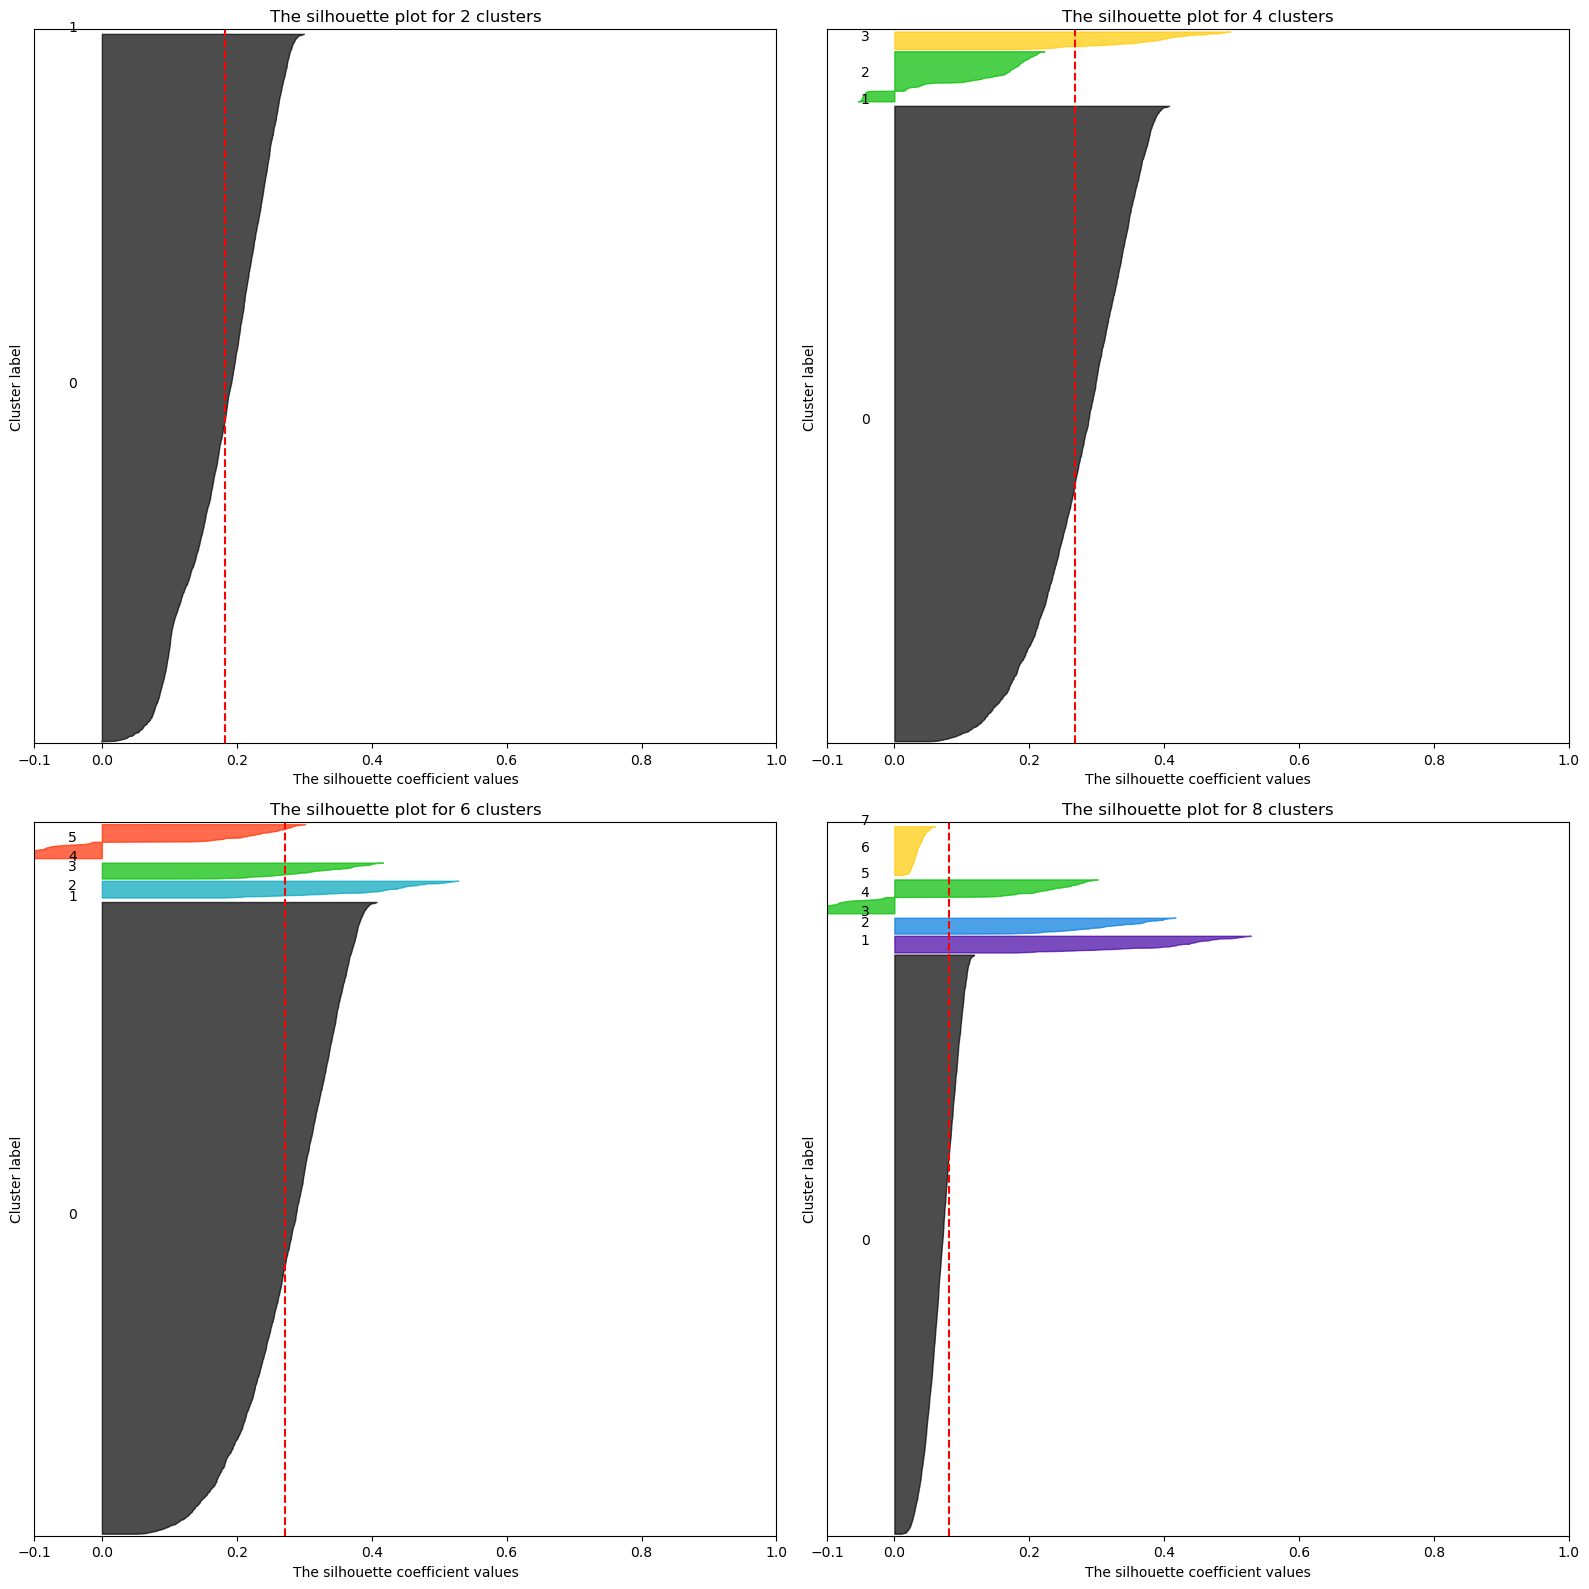

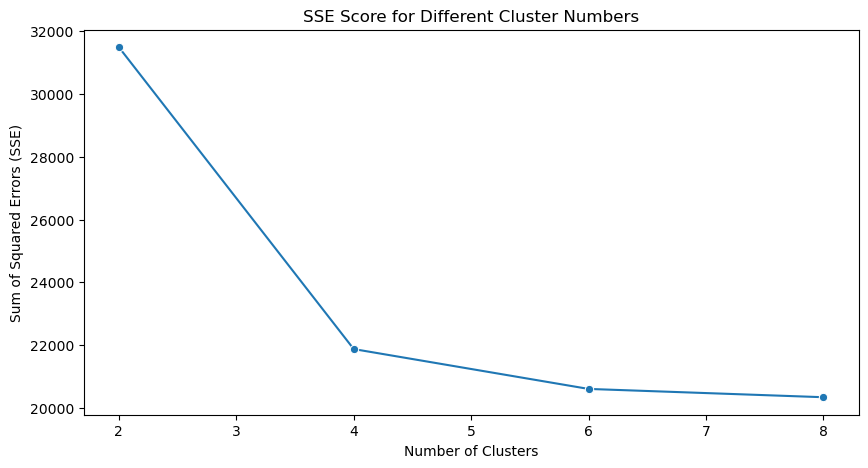

C:\Users\YaelD\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,SSE,silhouette_avg,samples_per_cluster,max_count,min_count,num_of_samples
num_of_clusters,,,,,,
2,31492.853503,0.182821,"{0: 3429, 1: 1}",3429,1,3430
4,21871.409811,0.267559,"{0: 3098, 1: 1, 2: 245, 3: 86}",3098,1,3430
6,20601.073880,0.270779,"{0: 3098, 1: 1, 2: 83, 3: 79, 4: 1, 5: 168}",3098,1,3430
8,20336.619018,0.080555,"{0: 2856, 1: 83, 2: 79, 3: 1, 4: 168, 5: 1, 6:...",2856,1,3430


In [6]:
# Defining the range of clusters
range_n_clusters = [2, 4, 6, 8]

# Creating an empty DataFrame to store the results
clusters_df = pd.DataFrame(columns=['num_of_clusters', 'SSE', 'silhouette_avg', 'samples_per_cluster', 'max_count', 'min_count', 'num_of_samples'])

# Creating a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Creating an empty list to store SSE scores for the different clusters
sse_scores = []

for n_clusters, ax in zip(range_n_clusters, axes.flatten()):
    # The subplot is the silhouette plot
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(dataframe) + (n_clusters + 1) * 10])

    # Performing K-means clustering
    KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(dataframe)
    cluster_labels = KMeans_cluster.labels_

    # Measuring quality using silhouette score
    silhouette_avg = silhouette_score(dataframe, cluster_labels)

    # Measuring quality using SSE
    sse = KMeans_cluster.inertia_
    sse_scores.append(sse)
    
    #===================Graphic visualization for silhouette analysis start=====================#
    # I used scikit library to make the next part 
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
    
    y_lower = 10
    cluster_samples = {}
    sample_silhouette_values = silhouette_samples(dataframe, cluster_labels)
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

        cluster_samples[i] = size_cluster_i

    ax.set_title(f"The silhouette plot for {n_clusters} clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels/ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    #===================Graphic visualization for silhouette analysis end=====================#
    
    # Collecting results into DataFrame
    sumple_count = np.bincount(cluster_labels)
    clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
                            'samples_per_cluster': cluster_samples, 'max_count': sumple_count.max(), 'min_count': sumple_count.min(),
                            'num_of_samples': sumple_count.sum()},
                            ignore_index=True)   
    
# Adjust layout
plt.tight_layout()
plt.show()

# Elbow Method - also studied in class, but more difficult to analyze, it won't hurt anyway
plt.figure(figsize=(10, 5))
sns.lineplot(x=range_n_clusters, y=sse_scores, marker='o')
plt.title('SSE Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Displaying the results DataFrame according to the number of clusters
clusters_df = clusters_df.set_index('num_of_clusters')
clusters_df

In [7]:
# Performing KMeans clustering with K=6 which is the optimal value chosen
kmeans = KMeans(n_clusters=6, random_state=42, n_init="auto").fit(dataframe)

# Get cluster labels
cluster_labels = kmeans.labels_

# Creating a new dataframe to store words for clusters
cluster_df = pd.DataFrame(index=dataframe.columns)
cluster_df['Cluster'] = cluster_labels[:len(cluster_df)]

# Grouping words by cluster
clustered_words = cluster_df.groupby('Cluster').apply(lambda x: list(x.index))

# Writing the words for each cluster to CSV and printing the list
for cluster, words in clustered_words.items():
    print(f"Cluster {cluster + 1} Words:")
    print(words)
    print()  # Empty line for clarity
    
    with open(f"KMeans_cluster_{cluster+1}_words.csv", "w") as f:
        f.write("Words\n")
        for word in words:
            f.write(f"{word}\n")

    print(f"CSV file 'KMeans_cluster_{cluster+1}_words.csv' containing words for Cluster {cluster + 1} has been generated.")
    print()  # Empty line for clarity

Cluster 1 Words:
['abandon', 'abc', 'abortion', 'absolute', 'abstain', 'abu', 'abuse', 'accept', 'access', 'accomplish', 'accusations', 'achieve', 'acknowledge', 'act', 'action', 'active', 'activist', 'actual', 'add', 'added', 'address', 'admin', 'administration', 'admit', 'advance', 'advantage', 'advertise', 'advised', 'affair', 'affect', 'afghanistan', 'afraid', 'afternoon', 'age', 'agencies', 'agenda', 'agree', 'ahead', 'aid', 'air', 'alaska', 'allegation', 'allegory', 'allied', 'allowed', 'alternative', 'altsite', 'amazing', 'amendment', 'america', 'american', 'amp', 'analysis', 'analyst', 'anecdotal', 'anger', 'angry', 'announce', 'annual', 'answer', 'apologies', 'appeal', 'appearance', 'applied', 'appointed', 'approach', 'approval', 'apr', 'april', 'arab', 'area', 'arg', 'argue', 'argument', 'arizona', 'arm', 'armstrong', 'army', 'arrest', 'arrive', 'asap', 'asked', 'ass', 'assess', 'assist', 'associate', 'assume', 'atlanta', 'atrios', 'attempt', 'attend', 'attention', 'attorney'

## Conclusion:
<h4> Optimal number of clusters:</h4>
<div align="justify"> Looking at the results (found in clusters_df), there seems to be a drop in the SSE result from 4 to 6 clusters, but the drop becomes less significant as the number of clusters increases further. The silhouette score (ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters) is the highest for 6 clusters (0.270779), which indicates that the data is well clustered, and as the number of clusters increases, the silhouette score decreases, indicating poorer cluster quality.
In addition, we can see what was also stated in the graphs, according to the graphs of silhouette analysis, it seems that any number of clusters other than 6 or 4 are a bad choice for the data, due to the presence of clusters with silhouette scores below the average, as well as due to the wide fluctuations in the size of the silhouette plots (thickness), according to the graph of SSE Score for different Cluster Numbers There is a drop between 4 and 6 clusters and the more moderate drop between the other clusters.
Therefore, since the silhouette score is higher and the SSE score is lower, it seems that 6 clusters may be the optimal choice.</div>

<h4> Maximum and minimum examples per cluster:</h4>
<div align="justify"> According to the selection of the optimal number of clusters the maximum number of examples is 3098, and the minimum number of examples is 1.</div>

<h4> The topic of each cluster:</h4>
<div align="justify">The topic of each cluster: from the words listed in each cluster, it appears that:
Cluster 1: This cluster seems to contain a wide range of words related to politics, activism, government, and public affairs. Words like "abortion," "campaign," "election," "democrat," "republican," "president," and "senate" indicate a focus on political discourse. Additionally, words like "protest," "activist," "agenda," and "demonstrate" suggest involvement in social and political activism.
Cluster 2: This cluster contains only one word, "hit," which doesn't provide much insight into the theme or focus of this cluster. It's possible that this cluster represents a small subset of data with a unique characteristic that is not captured by the words listed.
Cluster 4: The words in this cluster are diverse but seem to focus on various topics such as news, politics, and general discourse. Words like "mccain," "november," "program," "report," and "war" suggest a mix of political and current events-related content.
Cluster 5: Like Cluster 2, this cluster contains only one word, "brought," which doesn't offer much insight into the cluster's theme or focus. It's possible that this cluster represents a small subset of data with unique characteristics not captured by the word listed.
Cluster 6: This cluster appears to focus on topics related to data analysis, elections, and possibly marketing or advertising. Words like "calculate," "electoral," "affiliate," "article," "campaign," and "debate" suggest a focus on data-driven decision-making, electoral processes, and promotional activities.


Based on this analysis, it's clear that Cluster 1 and Cluster 6 have more meaningful words that provide insights into their themes or focuses. Cluster 1 seems to focus on political discourse and activism, while Cluster 6 appears to involve data analysis and electoral processes. Clusters 2, 4, and 5 contain fewer words or words that don't offer clear insights into their themes.

Furthermore, it seems that there are no more than 5 clusters, but the values we were asked to enter are 2,4,6,8, so one cluster has no values at all. In addition, since there are no values in this cluster, the minimum count in the previous section for the cluster is 1 because it does not find a cluster and fails to count zero.
</div>

## Partitional clustering - using DBSCAN

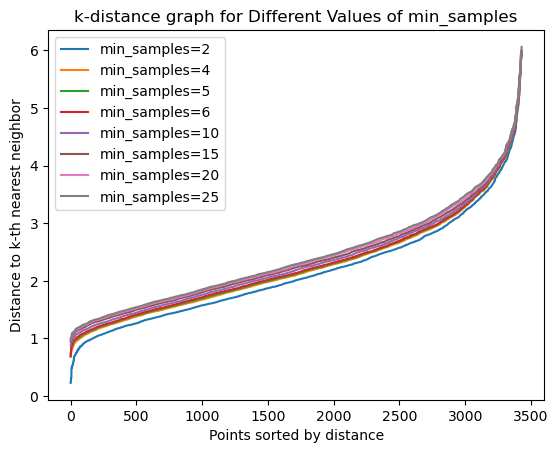

In [8]:
# Defining values of min_samples
min_samples_values = [2, 4, 5, 6, 10, 15 ,20, 25]

# Plotting k-distance graphs for different values of min_samples
for min_samples in min_samples_values:
    # Fiting the nearest neighbors model
    neighbors_model = NearestNeighbors(n_neighbors=min_samples)
    neighbors_model.fit(dataframe)

    # Calculating distances to k-nearest neighbors
    distances, _ = neighbors_model.kneighbors(dataframe)

    # Sorting distances in descending order
    distances = np.sort(distances, axis=0)[:, -1]

    # Ploting distances
    plt.plot(distances, label=f'min_samples={min_samples}')

plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to k-th nearest neighbor')
plt.title('k-distance graph for Different Values of min_samples')
plt.legend()
plt.show()

This part is intended to check which eps value in the DBSCAN algorithm to use. I found the method in a presentation taught in class, again it is an elbow graph so it is not accurate. According to the graph, the eps value is around point 4 in my estimation, so i chose 4.2 as the value of eps.

C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3042375735.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'min_samples': min_samples,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3042375735.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'min_samples': min_samples,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\3042375735.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'min_samples': min_samples,


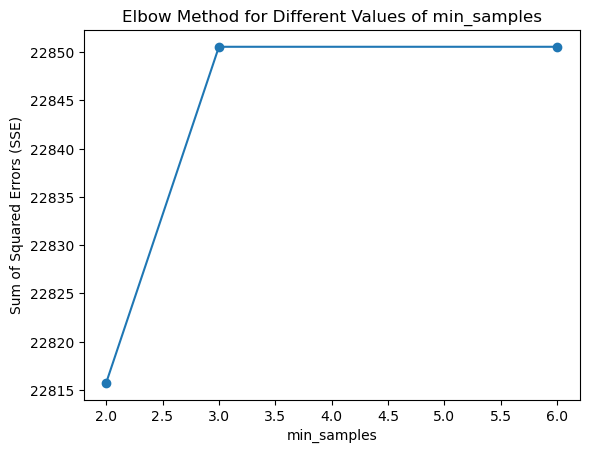

C:\Users\YaelD\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,num_of_clusters,SSE,silhouette,samples_per_cluster,max_count,min_count,num_of_samples
min_samples,,,,,,,
2,3,22815.744066,0.332305,"{-1: 102, 0: 3006, 1: 320, 2: 2}",3006,2,3430
3,2,22850.558788,0.405253,"{-1: 104, 0: 3006, 1: 320}",3006,104,3430
6,2,22850.558788,0.405253,"{-1: 104, 0: 3006, 1: 320}",3006,104,3430


In [9]:
# Defing values of min_samples value
min_samples_values = [2, 3, 6]

# Creating an empty DataFrame to store results
results_df = pd.DataFrame(columns=['min_samples', 'num_of_clusters', 'SSE', 'silhouette', 'samples_per_cluster', 'max_count', 'min_count', 'num_of_samples'])

# Creating an empty lists to store SSE for each min_samples value
sse_values = []

# Performing DBSCAN clustering for each min_samples value
for min_samples in min_samples_values:
    # Perform DBSCAN clustering
    db = DBSCAN(eps=4.2, min_samples=min_samples).fit(dataframe)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Silhouette score
    silhouette_avg = silhouette_score(dataframe, labels)

    # Counting of samples in each cluster
    unique_labels, counts = np.unique(labels, return_counts=True)
    samples_per_cluster = dict(zip(unique_labels, counts))

    # Maximum and minimum count of samples in clusters
    max_count = max(counts)
    min_count = min(counts)

    # Total number of samples
    num_of_samples = len(labels)

    # Calculating SSE
    sse = 0
    for cluster_label in set(labels):
        cluster_points = dataframe[labels == cluster_label]
        centroid = cluster_points.mean(axis=0)
        sse += ((cluster_points - centroid) ** 2).sum().sum()

    # Appending results to DataFrame
    results_df = results_df.append({'min_samples': min_samples,
                                    'num_of_clusters': n_clusters,
                                    'SSE': sse,
                                    'silhouette': silhouette_avg,
                                    'samples_per_cluster': samples_per_cluster,
                                    'max_count': max_count,
                                    'min_count': min_count,
                                    'num_of_samples': num_of_samples}, ignore_index=True)

    # Appending SSE to the list for elbow method plot
    sse_values.append(sse)

# Plotting elbow method graph for SSE
plt.plot(min_samples_values, sse_values, marker='o')
plt.title('Elbow Method for Different Values of min_samples')
plt.xlabel('min_samples')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Display the results DataFrame according to the min_samples value
results_df = results_df.set_index('min_samples')
results_df

In [10]:
# DBSCAN with the optimal parameters
dbscan = DBSCAN(eps=4.2, min_samples=3).fit(dataframe)

# Geting cluster labels
cluster_labels = dbscan.labels_

# Creating a new dataframe to store words for clusters
cluster_df = pd.DataFrame(index=dataframe.columns)
cluster_df['Cluster'] = cluster_labels[:len(cluster_df)]

# Grouping words by cluster
clustered_words = cluster_df.groupby('Cluster').apply(lambda x: list(x.index))

# Writing the words for each cluster to CSV and printing the list
for cluster, words in clustered_words.items():
    print(f"Cluster {cluster} Words:")
    print(words)
    print() # Empty line for clarity

    with open(f"DBSCAN_cluster_{cluster}_words.csv", "w") as f:
        f.write("Words\n")
        for word in words:
            f.write(f"{word}\n")

    print(f"CSV file 'DBSCAN_cluster_{cluster}_words.csv' containing words for Cluster {cluster} has been generated.")
    print() # Empty line for clarity


Cluster -1 Words:
['acknowledge', 'added', 'amazing', 'call', 'carolina', 'cases', 'choose', 'command', 'compare', 'credit', 'estimate', 'found', 'hurt', 'idetestthispres', 'light', 'meteor', 'midday', 'minister', 'missouri', 'mistake', 'month', 'natural', 'neighbor', 'outrage', 'password', 'poor', 'population', 'predict', 'pressure', 'pretend', 'provide', 'ready', 'remark', 'round', 'shouldnt', 'shown', 'spend', 'stage', 'tool', 'trade', 'trial', 'undecided', 'weekly', 'wrote']

CSV file 'DBSCAN_cluster_-1_words.csv' containing words for Cluster -1 has been generated.

Cluster 0 Words:
['abandon', 'abc', 'abortion', 'absolute', 'abstain', 'abu', 'abuse', 'accept', 'access', 'accomplish', 'accusations', 'achieve', 'act', 'action', 'active', 'activist', 'actual', 'add', 'address', 'admin', 'administration', 'admit', 'advance', 'advantage', 'advertise', 'advised', 'affair', 'affect', 'afghanistan', 'afraid', 'afternoon', 'age', 'agencies', 'agenda', 'agree', 'ahead', 'aid', 'air', 'alask

## Conclusion:
<h4> Optimal value of min_samples:</h4>
<div align="justify">The min_samples parameter in DBSCAN affects the clustering result by specifying the minimum number of samples required to form a dense region (i.e., a core point), a high value of min_samples will result in fewer clusters and a low value of min_samples will result in more clusters.
In the case of my data there is a slight increase in SSE for the value min_samples=3 and min_samples=2, however this increase is small compared to the increase in the silhouette score which is higher for min_samples=3 (0.405253) (the ratio of the increase in the SSE score is 1.001 compared to the ratio of the increase in the the parallelogram which is 1.219).
Therefore, I will choose the value min_samples=3 as an optimal value. 
</div>

<h4> Maximum and minimum examples per cluster:</h4>
<div align="justify"> According to the selection of the optimal value of min_samples the maximum number of examples is 3006, and the minimum number of examples is 104.</div>

<h4> The topic of each cluster:</h4>
<div align="justify"> e.	The topic of each cluster:
Cluster -1 (Noise):The words in Cluster -1 don't seem to follow a specific theme or topic, they appear to be a mixture of various words that don't necessarily relate to a specific concept or category. Some of these words include "acknowledge," "cases," "credit," "pressure," "trade," and "weekly." This indicates that Cluster -1 represents noise or outliers in the data.
Cluster 0:The words in Cluster 0 seem to relate to political and governmental topics. There are mentions of political figures such as "bush," "cheney," "kerry," and "lieberman." Additionally, there are words related to politics and governance, such as "campaign," "congress," "election," "government," "policy," and "presidential." This suggests that Cluster 0 may represent discussions or articles related to politics, elections, and government affairs.
Cluster 1:The words in Cluster 1 seem to cover a range of topics, including news, events, and general discussions. There are mentions of specific events or incidents such as "debate," "attack," "memorial," and "release." Additionally, there are words related to media and communication, such as "article," "blog," "conversation," "magazine," and "report." This cluster seems to encompass a broader range of topics compared to the more politically focused Cluster 0.
In summary, based on the words associated with each cluster:
Cluster -1 represents noise or outliers.
Cluster 0 likely focuses on political and governmental topics.
Cluster 1 covers a broader range of topics, such as news, events, and general discussions.
</div>

## Partitional clustering - using TSNE

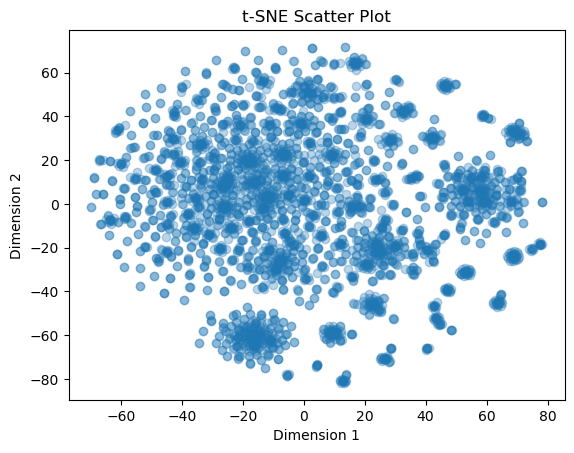

In [11]:
# Run t-SNE with normalized data
tSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(dataframe)

# Plot scatter plot
plt.figure()
plt.scatter(tSNE[:, 0], tSNE[:, 1], alpha=0.3)
plt.title('t-SNE Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

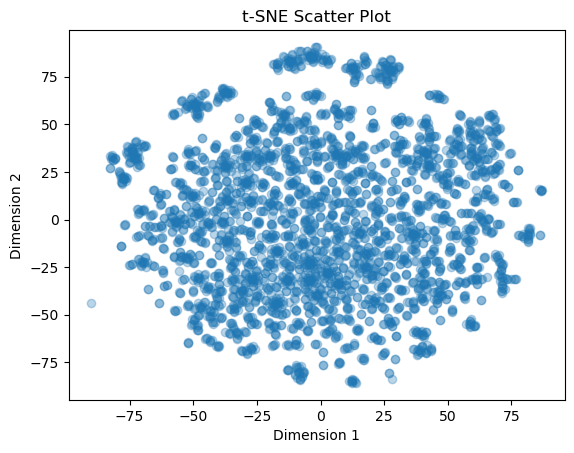

In [12]:
# Run t-SNE whit denormalized data
tSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(dataframe_not_normalize)

# Plot scatter plot
plt.figure()
plt.scatter(tSNE[:, 0], tSNE[:, 1], alpha=0.3)
plt.title('t-SNE Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Conclusion:
<div align="justify">In many cases, t-SNE produces meaningful embeddings even without normalization, therefore I'll try this algorithm on normalized and denormalized data.</div>

<div align="justify"> Understanding the number of clusters from the visualization for the normalized data:
According to the two-dimensional scatter plot we received for the t-SNE algorithm, it seems that our information has cluster 3 or 4.</div>

<div align="justify"> Understanding the number of clusters from the visualization for the denormalized data:
According to the two-dimensional scatter plot we received for the t-SNE algorithm, it seems that our information has cluster 2 or 4.
</div>

<div align="justify"> The visualization gives a general direction regarding the number of clusters with and without normalization. It seems that in both cases there are between 2-4 clusters, so far in the assignment we have received for K-Means 3 significant clusters and for DBSCAN 2 therefore the visualization supports the findings but does not help to make them more precise.</div>


## Partitional clustering - using PCA + KMeans

C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\1418433559.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\1418433559.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\1418433559.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
C:\Users\YaelD\AppData\Local\Temp\ipykernel_22928\14184335

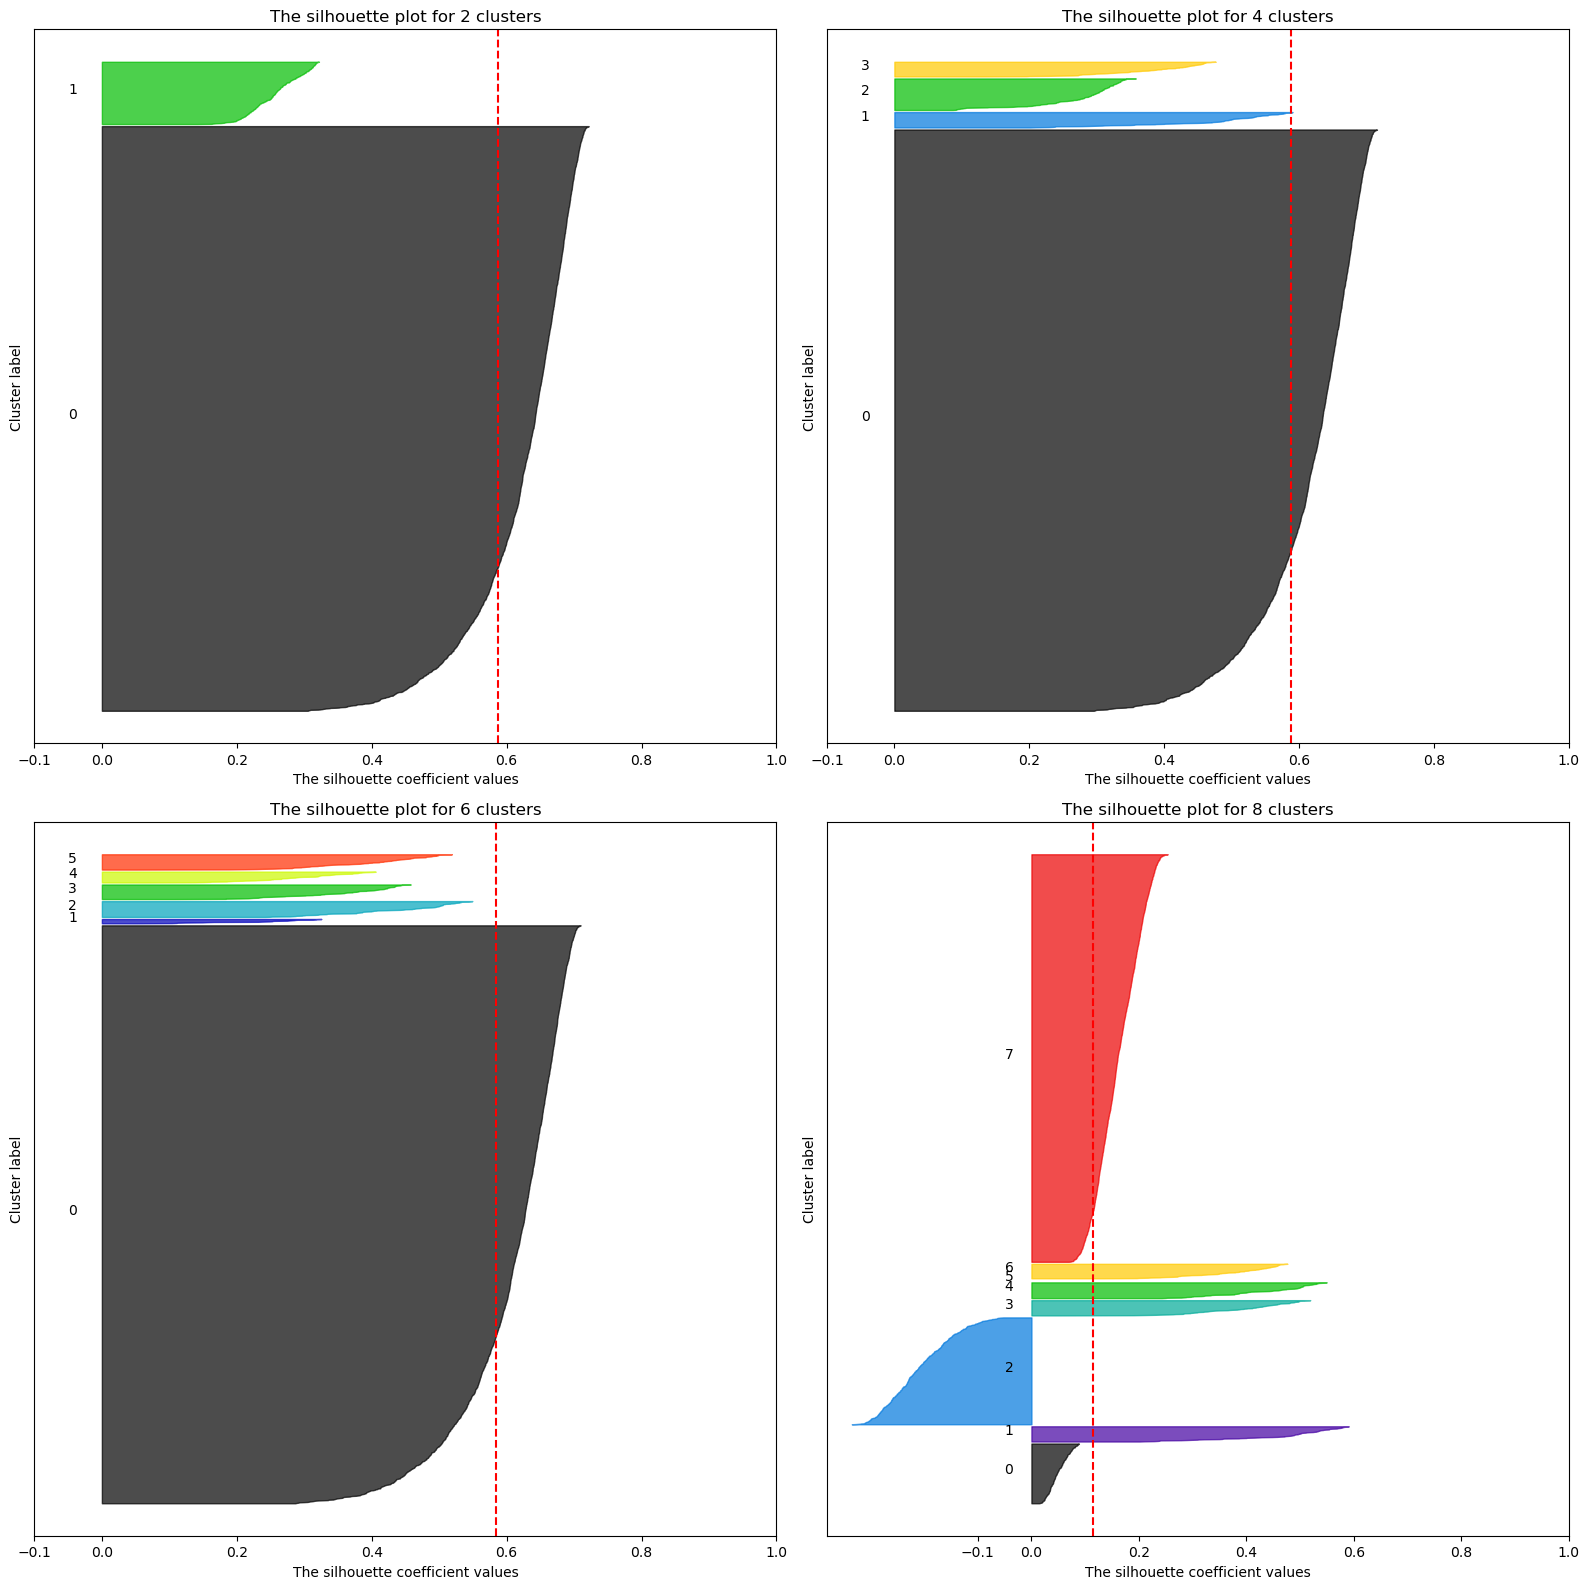

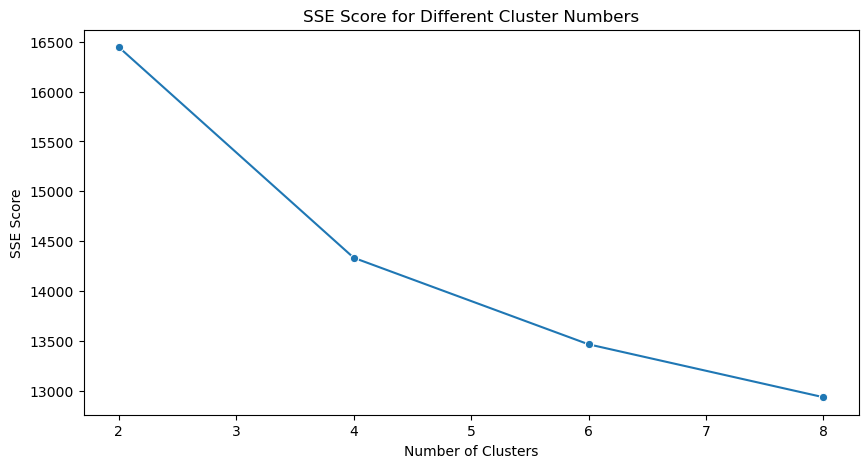

Number of features before PCA: 1545
Number of features after PCA: 344
Number of features lost during PCA: 1201


C:\Users\YaelD\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,SSE,silhouette_avg,samples_per_cluster,max_count,min_count,num_of_samples
num_of_clusters,,,,,,
2,16444.323756,0.587197,"{0: 3099, 1: 331}",3099,331,3430
4,14333.329087,0.588520,"{0: 3099, 1: 83, 2: 169, 3: 79}",3099,79,3430
6,13465.707497,0.583642,"{0: 3099, 1: 24, 2: 86, 3: 79, 4: 59, 5: 83}",3099,24,3430
8,12935.342538,0.113640,"{0: 323, 1: 83, 2: 577, 3: 83, 4: 86, 5: 1, 6:...",2198,1,3430


In [13]:
# Defining the range of clusters
range_n_clusters = [2, 4, 6, 8]

# Creating an empty DataFrame to store the results
clusters_df = pd.DataFrame(columns=['num_of_clusters', 'SSE', 'silhouette_avg', 'samples_per_cluster', 'max_count', 'min_count', 'num_of_samples'])

# Creating a subplot with 4 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Creating an empty list to store SSE scores for the different clusters
sse_scores = []

# Number of features before PCA
num_features_before_pca = len(dataframe.columns)

for n_clusters, ax in zip(range_n_clusters, axes.flatten()):
    # PCA
    pca = PCA(n_components=0.8)  # 80% explained variance
    data_pca = pca.fit_transform(dataframe)

    # Performing K-means clustering
    KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(data_pca)
    cluster_labels = KMeans_cluster.labels_

    # Measuring quality using silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)

    # Measuring quality using SSE
    sse = KMeans_cluster.inertia_
    sse_scores.append(sse)

    #===================Graphic visualization for silhouette analysis start=====================#

    y_lower = 10
    cluster_samples = {}
    sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

        cluster_samples[i] = size_cluster_i

    ax.set_title(f"The silhouette plot for {n_clusters} clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels/ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #===================Graphic visualization for silhouette analysis end=====================#

    # Collect results into the DataFrame
    sample_count = np.bincount(cluster_labels)
    clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
                                      'samples_per_cluster': cluster_samples, 'max_count': sample_count.max(),
                                      'min_count': sample_count.min(),
                                      'num_of_samples': sample_count.sum()},
                                     ignore_index=True)

# Adjust layout
plt.tight_layout()
plt.show()

# Elbow Method - also studied in class, but more difficult to analyze, it won't hurt anyway
plt.figure(figsize=(10, 5))
sns.lineplot(x=range_n_clusters, y=sse_scores, marker='o')
plt.title('SSE Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Score')
plt.show()

# Number of features after PCA
num_features_after_pca = pca.n_components_

# Number of features lost
num_features_lost = num_features_before_pca - num_features_after_pca

print(f"Number of features before PCA: {num_features_before_pca}")
print(f"Number of features after PCA: {num_features_after_pca}")
print(f"Number of features lost during PCA: {num_features_lost}")

# The table of results according to the number of clusters
clusters_df = clusters_df.set_index('num_of_clusters')
clusters_df

In [14]:
# Performing PCA and KMeans clustering with K=4 which is the optimal value chosen
pca = PCA(n_components=0.8)  # 80% explained variance
data_pca = pca.fit_transform(dataframe)
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto").fit(data_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Creating a new dataframe to store words for clusters
cluster_df = pd.DataFrame(index=dataframe.columns)
cluster_df['Cluster'] = cluster_labels[:len(cluster_df)]

# Grouping words by cluster
clustered_words = cluster_df.groupby('Cluster').apply(lambda x: list(x.index))

# Writing the words for each cluster to CSV and printing the list
for cluster, words in clustered_words.items():
    print(f"Cluster {cluster + 1} Words:")
    print(words)
    print()  # Empty line for clarity
    
    with open(f"PCA_KMeans_cluster_{cluster+1}_words.csv", "w") as f:
        f.write("Words\n")
        for word in words:
            f.write(f"{word}\n")

    print(f"CSV file 'PCA_KMeans_cluster_{cluster+1}_words.csv' containing words for Cluster {cluster + 1} has been generated.")
    print()  # Empty line for clarity

Cluster 1 Words:
['abandon', 'abc', 'abortion', 'absolute', 'abstain', 'abu', 'abuse', 'accept', 'access', 'accomplish', 'accusations', 'achieve', 'acknowledge', 'act', 'action', 'active', 'activist', 'actual', 'add', 'added', 'address', 'admin', 'administration', 'admit', 'advance', 'advantage', 'advertise', 'advised', 'affair', 'affect', 'afghanistan', 'afraid', 'afternoon', 'age', 'agencies', 'agenda', 'agree', 'ahead', 'aid', 'air', 'alaska', 'allegation', 'allegory', 'allied', 'allowed', 'alternative', 'altsite', 'amazing', 'amendment', 'america', 'american', 'amp', 'analysis', 'analyst', 'anecdotal', 'anger', 'angry', 'announce', 'annual', 'answer', 'apologies', 'appeal', 'appearance', 'applied', 'appointed', 'approach', 'approval', 'apr', 'april', 'arab', 'area', 'arg', 'argue', 'argument', 'arizona', 'arm', 'armstrong', 'army', 'arrest', 'arrive', 'asap', 'asked', 'ass', 'assess', 'assist', 'associate', 'assume', 'atlanta', 'atrios', 'attempt', 'attend', 'attention', 'attorney'

## Conclusion:
<h4> Optimal number of clusters:</h4>
<div align="justify"> As in the first part where we ran K-Means without PCA the deliberation is between 6 clusters and 4 clusters, this time the relative decrease (1.064) in the SSE score between 4 and 6 clusters is greater than the relative decrease in the silhouette score (1.008), therefore I will still choose - 6 clusters as an optimal number of clusters.
Therefore, even though the silhouette score is lower the SSE score is lower too, it seems that 6 clusters may be the optimal choice.
</div>

<h4> Maximum and minimum examples per cluster:</h4>
<div align="justify"> According to the selection of the optimal number of clusters the maximum number of examples is 3099, and the minimum number of examples is 24.</div>

<h4> The topic of each cluster:</h4>
<div align="justify"> From the words listed in each cluster, it appears that:
Cluster 1: This cluster includes words related to politics, activism, government, and societal matters. Words like "abortion," "activist," "administration," "bush," "campaign," "congress," "democracy," "election," "iraq," "president," and "terrorism" indicate a focus on political and social issues.
Cluster 3: This cluster seems to revolve around words related to electoral processes, campaigning, and political strategy. Words like "candidate," "debate," "electoral," "campaign," "endorsement," "poll," "vote," and "win" suggest a focus on election-related topics.

Cluster 4: This cluster contains a diverse range of words that don't seem to fit into a specific thematic category. It includes words like "magazine," "mccain," "mother," "newspaper," "san," "war," "web," and "wrong." These words cover a broad spectrum of topics, indicating a less obvious theme compared to the other clusters.

Here too we see that there are empty clusters as we saw last time without PCA.

</div>